In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency, f_oneway
import geopandas as gpd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv('Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')

In [3]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137700 entries, 0 to 137699
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Data As Of                                137700 non-null  object 
 1   Start Date                                137700 non-null  object 
 2   End Date                                  137700 non-null  object 
 3   Group                                     137700 non-null  object 
 4   Year                                      134946 non-null  float64
 5   Month                                     123930 non-null  float64
 6   State                                     137700 non-null  object 
 7   Sex                                       137700 non-null  object 
 8   Age Group                                 137700 non-null  object 
 9   COVID-19 Deaths                           98270 non-null   float64
 10  Total 

In [4]:
# Display first few rows
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   Data As Of  Start Date    End Date     Group  Year  Month          State  \
0  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
1  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
2  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
3  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
4  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   

         Sex     Age Group  COVID-19 Deaths  Total Deaths  Pneumonia Deaths  \
0  All Sexes      All Ages        1146774.0    12303399.0         1162844.0   
1  All Sexes  Under 1 year            519.0       73213.0            1056.0   
2  All Sexes    0-17 years           1696.0      130970.0            2961.0   
3  All Sexes     1-4 years            285.0       14299.0             692.0   
4  All Sexes    5-14 years            509.0       22008.0             818.0   

   Pneumonia and COVID-19 Deaths  I

In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                Year          Month  COVID-19 Deaths  Total Deaths  \
count  134946.000000  123930.000000     9.827000e+04  1.181910e+05   
mean     2021.408163       6.200000     3.135865e+02  2.841953e+03   
std         1.086439       3.350635     5.992341e+03  5.620138e+04   
min      2020.000000       1.000000     0.000000e+00  0.000000e+00   
25%      2020.000000       3.000000     0.000000e+00  4.300000e+01   
50%      2021.000000       6.000000     0.000000e+00  1.530000e+02   
75%      2022.000000       9.000000     5.000000e+01  6.570000e+02   
max      2023.000000      12.000000     1.146774e+06  1.230340e+07   

       Pneumonia Deaths  Pneumonia and COVID-19 Deaths  Influenza Deaths  \
count      9.283600e+04                  100816.000000     111012.000000   
mean       3.365971e+02                     152.513411          5.002468   
std        6.126574e+03                    2980.886938        110.606691   
min        0.000000e+00                     

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Data As Of                                      0
Start Date                                      0
End Date                                        0
Group                                           0
Year                                         2754
Month                                       13770
State                                           0
Sex                                             0
Age Group                                       0
COVID-19 Deaths                             39430
Total Deaths                                19509
Pneumonia Deaths                            44864
Pneumonia and COVID-19 Deaths               36884
Influenza Deaths                            26688
Pneumonia, Influenza, or COVID-19 Deaths    44233
Footnote                                    39804
dtype: int64


In [7]:
# Handle missing values
# Fill numerical columns with median
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
# Convert 'Start Date' and 'End Date' to datetime
df["Start Date"] = pd.to_datetime(df["Start Date"], errors="coerce")
df["End Date"] = pd.to_datetime(df["End Date"], errors="coerce")

In [9]:
# Descriptive Statistics: By Sex
desc_by_sex = df.groupby('Sex')[['COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths', 
                                 'Influenza Deaths', 'Pneumonia, Influenza, or COVID-19 Deaths']].describe()
print("\nDescriptive Statistics by Sex:\n", desc_by_sex)


Descriptive Statistics by Sex:
           COVID-19 Deaths                                                \
                    count        mean          std  min  25%  50%   75%   
Sex                                                                       
All Sexes         45900.0  336.159477  7144.189461  0.0  0.0  0.0  38.0   
Female            45900.0  148.516013  3227.191345  0.0  0.0  0.0  16.0   
Male              45900.0  186.700327  3932.578983  0.0  0.0  0.0  22.0   

                     Total Deaths               ... Influenza Deaths           \
                 max        count         mean  ...              75%      max   
Sex                                             ...                             
All Sexes  1146774.0      45900.0  3674.800305  ...              0.0  22229.0   
Female      517046.0      45900.0  1717.814139  ...              0.0  11381.0   
Male        629728.0      45900.0  1990.350588  ...              0.0  10848.0   

          Pneumonia, Influenz

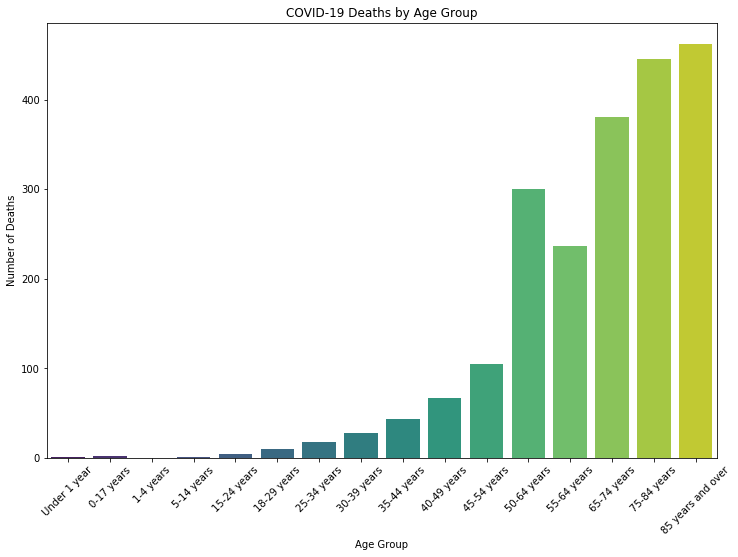

In [10]:
# Mortality by age group 
if 'Age Group' in df.columns and 'COVID-19 Deaths' in df.columns:
    df_filtered = df[df['Age Group'] != 'All Ages']
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_filtered, x='Age Group', y='COVID-19 Deaths', ci=None, palette='viridis')
    plt.xticks(rotation=45)
    plt.title('COVID-19 Deaths by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Deaths')
    plt.grid(False)
    plt.show()

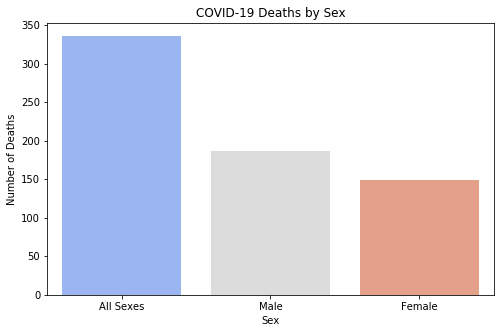

In [11]:
# Mortality by sex 
if 'Sex' in df.columns and 'COVID-19 Deaths' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='Sex', y='COVID-19 Deaths', ci=None, palette='coolwarm')
    plt.title('COVID-19 Deaths by Sex')
    plt.xlabel('Sex')
    plt.ylabel('Number of Deaths')
    plt.grid(False)
    plt.show()

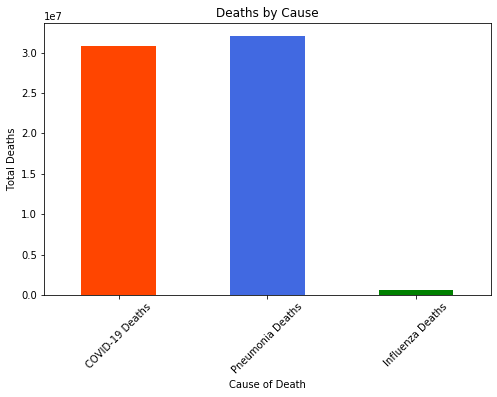

In [12]:
# Plot: Deaths by Cause
df_cause = df[['COVID-19 Deaths', 'Pneumonia Deaths', 'Influenza Deaths']].sum()

plt.figure(figsize=(8, 5))
df_cause.plot(kind='bar', color=['orangered', 'royalblue', 'green'])
plt.title("Deaths by Cause")
plt.xlabel("Cause of Death")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


In [13]:
# Convert Year column to integer
df['Year'] = df['Year'].astype(int, errors='ignore')

In [14]:
# Subset Analysis: Mortality by Gender and Year
gender_year_summary = df.groupby(['Year', 'Sex'])['COVID-19 Deaths'].sum().reset_index()

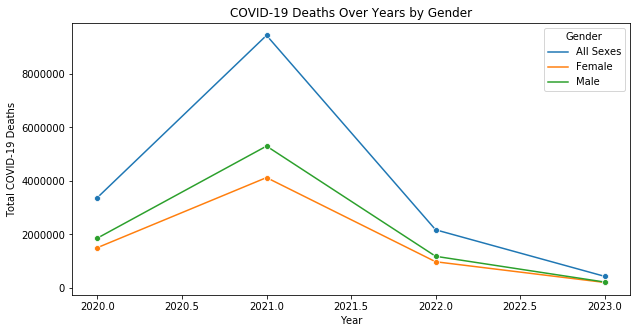

In [15]:
# Visualization: Line chart for COVID-19 deaths over years by gender
plt.figure(figsize=(10, 5))
sns.lineplot(data=gender_year_summary, x='Year', y='COVID-19 Deaths', hue='Sex', marker='o')
plt.title("COVID-19 Deaths Over Years by Gender")
plt.xlabel("Year")
plt.ylabel("Total COVID-19 Deaths")
plt.legend(title="Gender")
plt.show()

In [16]:
# Statistical Analysis: Chi-Square test for independence between Sex and COVID-19 deaths
contingency_table = pd.crosstab(df['Sex'], df['COVID-19 Deaths'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2={chi2}, p-value={p}")

Chi-Square Test: chi2=8175.830952020229, p-value=3.9931104997593633e-19


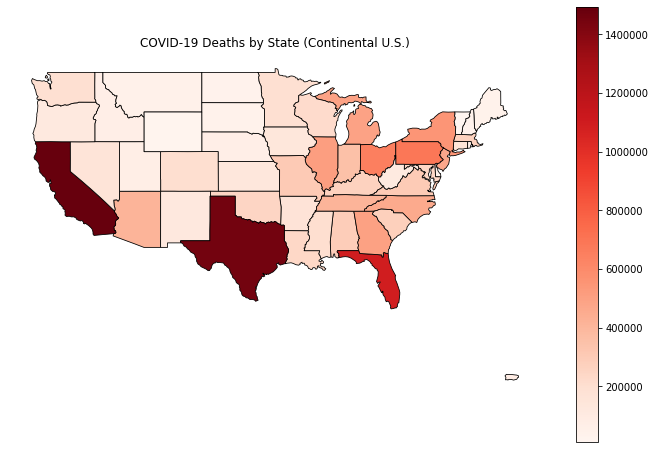

In [17]:
# Load US States map
usa_map = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
# Aggregate COVID-19 deaths by state
state_mortality = df.groupby('State')[['COVID-19 Deaths']].sum().reset_index()

# Merge with the geospatial data
usa_map = usa_map.merge(state_mortality, left_on='name', right_on='State', how='left').fillna(0)

# Filter out Alaska and Hawaii
usa_map = usa_map[~usa_map['name'].isin(['Alaska', 'Hawaii'])]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
usa_map.plot(column='COVID-19 Deaths', cmap='Reds', linewidth=0.8, edgecolor='black', legend=True, ax=ax)

plt.title("COVID-19 Deaths by State (Continental U.S.)")
plt.axis('off')  # Remove axes for better visualization
plt.show()

In [18]:
# Display unique values in the 'Age Group' column
unique_ages = df["Age Group"].unique()
print(unique_ages)


['All Ages' 'Under 1 year' '0-17 years' '1-4 years' '5-14 years'
 '15-24 years' '18-29 years' '25-34 years' '30-39 years' '35-44 years'
 '40-49 years' '45-54 years' '50-64 years' '55-64 years' '65-74 years'
 '75-84 years' '85 years and over']


In [19]:
# Remove "All Ages" rows from the dataset
df = df[df["Age Group"] != "All Ages"]

In [20]:
def convert_age_group(age_group):
    if age_group == "Under 1 year":
        return 0  # Newborns as 0
    elif age_group == "85 years and over":
        return 85  # Assign lower bound
    elif "-" in age_group:  
        return int(age_group.split("-")[0])  # Take the lower bound of the range
    elif "All Ages" in age_group:
        return None  # Assign NaN for analysis
    else:
        return None  # Catch any unexpected values

df["Age Numeric"] = df["Age Group"].apply(convert_age_group)

In [21]:
unique_ages1 = df["Age Numeric"].unique()
print(unique_ages1)

[ 0  1  5 15 18 25 30 35 40 45 50 55 65 75 85]


In [22]:
# Create new variables using existing columns
df["COVID Mortality Rate (%)"] = (df["COVID-19 Deaths"] / df["Total Deaths"]) * 100
df["Pneumonia/Influenza Death Rate (%)"] = (df["Pneumonia, Influenza, or COVID-19 Deaths"] / df["Total Deaths"]) * 100

# Ensure no division by zero issues
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [23]:
# Gender-based Mortality Summary
gender_summary = df.groupby("Sex")[["COVID Mortality Rate (%)", "Pneumonia/Influenza Death Rate (%)"]].describe().round(2)
print("\n Gender Summary Statistics:")
display(gender_summary)



 Gender Summary Statistics:


COVID Mortality Rate (%)                                          \
                             count  mean   std  min  25%  50%   75%    max   
Sex                                                                          
All Sexes                  42693.0  3.70  7.21  0.0  0.0  0.0  4.57  71.47   
Female                     41785.0  3.20  7.14  0.0  0.0  0.0  2.70  69.39   
Male                       42264.0  3.46  7.31  0.0  0.0  0.0  3.54  72.47   

          Pneumonia/Influenza Death Rate (%)                                  \
                                       count   mean    std  min   25%    50%   
Sex                                                                            
All Sexes                            42693.0  24.44  37.21  0.0  5.71  12.33   
Female                               41785.0  30.89  46.00  0.0  0.00  13.89   
Male                                 42264.0  25.32  38.07  0.0  3.72  13.09   

                         
             75%    max  
Sex                      
All Sexes  25.97  250.0  
Female     35.74  250.0  
Male       28.22  250.0

In [24]:

# Yearly Mortality Summary
year_summary = df.groupby("Year")[["COVID Mortality Rate (%)", "Pneumonia/Influenza Death Rate (%)"]].describe().round(2)
print("\n Yearly Summary Statistics:")
display(year_summary)


 Yearly Summary Statistics:


COVID Mortality Rate (%)                                          \
                        count  mean   std  min  25%  50%   75%    max   
Year                                                                    
2020                  32945.0  3.71  7.79  0.0  0.0  0.0  4.39  72.47   
2021                  35580.0  6.12  9.14  0.0  0.0  0.0  9.96  57.14   
2022                  33045.0  2.63  5.75  0.0  0.0  0.0  3.06  43.48   
2023                  25172.0  0.46  1.26  0.0  0.0  0.0  0.00  14.06   

     Pneumonia/Influenza Death Rate (%)                                  \
                                  count   mean    std  min   25%    50%   
Year                                                                      
2020                            32945.0  26.87  40.07  0.0  4.22  13.64   
2021                            35580.0  28.10  40.00  0.0  6.96  15.73   
2022                            33045.0  28.32  42.76  0.0  5.71  12.63   
2023                            25172.0  23.19  39.40  0.0  0.00   8.10   

                    
        75%    max  
Year                
2020  30.12  250.0  
2021  30.12  250.0  
2022  30.49  250.0  
2023  24.27  250.0

In [25]:
# Mortality Rates by Gender
gender_rates = df.groupby("Sex")[["COVID Mortality Rate (%)", "Pneumonia/Influenza Death Rate (%)"]].mean().round(2)
print("\n Mortality Rates by Gender:")
display(gender_rates)


 Mortality Rates by Gender:


,COVID Mortality Rate (%),Pneumonia/Influenza Death Rate (%)
Sex,,
All Sexes,3.70,24.44
Female,3.20,30.89
Male,3.46,25.32


In [26]:
# Mortality Rates by Age Group
age_rates = df.groupby("Age Group")[["COVID Mortality Rate (%)", "Pneumonia/Influenza Death Rate (%)"]].mean().round(2)
print("\n Mortality Rates by Age Group:")
display(age_rates)


 Mortality Rates by Age Group:


,COVID Mortality Rate (%),Pneumonia/Influenza Death Rate (%)
Age Group,,
0-17 years,0.08,34.05
1-4 years,0.05,20.60
15-24 years,0.29,33.19
18-29 years,0.72,33.67
25-34 years,1.42,36.16
30-39 years,2.22,35.67
35-44 years,3.21,34.96
40-49 years,4.49,34.44
45-54 years,5.61,30.53


In [27]:
# Mortality Rates by Year
year_rates = df.groupby("Year")[["COVID Mortality Rate (%)", "Pneumonia/Influenza Death Rate (%)"]].mean().round(2)
print("\n Mortality Rates by Year:")
display(year_rates)


 Mortality Rates by Year:


,COVID Mortality Rate (%),Pneumonia/Influenza Death Rate (%)
Year,,
2020,3.71,26.87
2021,6.12,28.10
2022,2.63,28.32
2023,0.46,23.19


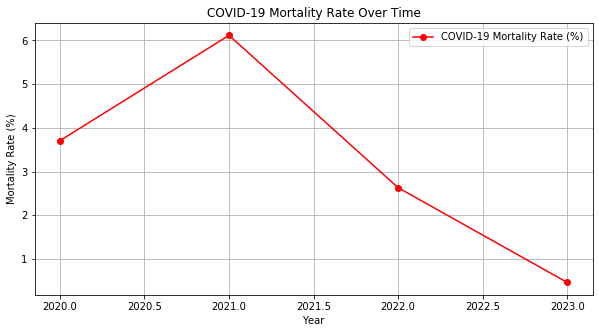

In [28]:
# Aggregate COVID-19 mortality rate by year
yearly_covid_trend = df.groupby("Year")["COVID Mortality Rate (%)"].mean()

# Plot COVID-19 mortality rate trend
plt.figure(figsize=(10, 5))
plt.plot(yearly_covid_trend.index, yearly_covid_trend.values, marker="o", linestyle="-", color="red", label="COVID-19 Mortality Rate (%)")

# Formatting
plt.xlabel("Year")
plt.ylabel("Mortality Rate (%)")
plt.title("COVID-19 Mortality Rate Over Time")
plt.legend()
plt.grid(True)
plt.show()


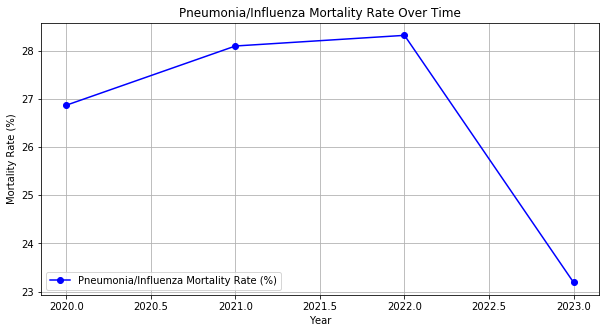

In [29]:
# Aggregate Pneumonia/Influenza mortality rate by year
yearly_pneumonia_trend = df.groupby("Year")["Pneumonia/Influenza Death Rate (%)"].mean()

# Plot Pneumonia/Influenza mortality rate trend
plt.figure(figsize=(10, 5))
plt.plot(yearly_pneumonia_trend.index, yearly_pneumonia_trend.values, marker="o", linestyle="-", color="blue", label="Pneumonia/Influenza Mortality Rate (%)")

# Formatting
plt.xlabel("Year")
plt.ylabel("Mortality Rate (%)")
plt.title("Pneumonia/Influenza Mortality Rate Over Time")
plt.legend()
plt.grid(True)
plt.show()


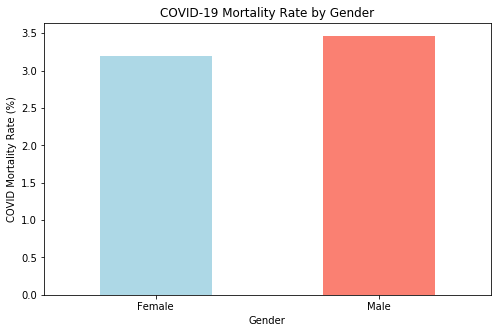

In [30]:
# Filter dataset to include only Male and Female
df_filtered = df[df["Sex"].isin(["Male", "Female"])]

# Aggregate mortality rates by gender
gender_mortality = df_filtered.groupby("Sex")["COVID Mortality Rate (%)"].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(8, 5))
gender_mortality.plot(kind="bar", color=["lightblue", "salmon"])
plt.xlabel("Gender")
plt.ylabel("COVID Mortality Rate (%)")
plt.title("COVID-19 Mortality Rate by Gender")
plt.xticks(rotation=0)
plt.grid(False)
plt.show()
df = df.drop(columns=['Footnote'])

In [31]:
# Select Potential Predictors (Excluding Target)
potential_features = [
    "Year", "Month", "Age Numeric",  
    "Total Deaths", "Pneumonia Deaths", "Influenza Deaths", 
    "Pneumonia and COVID-19 Deaths"
]
target = "COVID Mortality Rate (%)"

In [32]:
# Split Data (Before Imputation)
X_train, X_test, y_train, y_test = train_test_split(df[potential_features], df[target], test_size=0.2, random_state=42)
df = df.dropna(subset=[target])


In [33]:
# Detect & Remove Outliers from X_train & y_train (Before Imputation!)
def remove_outliers(X, y, threshold=3):
    """
    Removes outliers based on the standard deviation method.
    Only applies to training data to prevent data leakage.
    """
    z_scores = np.abs((X - X.mean()) / X.std())  # Compute z-scores
    non_outliers = (z_scores < threshold).all(axis=1)  # Keep rows where all features are below the threshold
    return X[non_outliers], y[non_outliers]

In [34]:
# Impute missing values for ALL numeric features (not just Age Numeric)
imputer = SimpleImputer(strategy="mean")
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Re-check for NaNs (Should now be zero)
print("\n Missing Values After Imputation:")
print(X_train_imputed.isnull().sum())
print(X_test_imputed.isnull().sum())



 Missing Values After Imputation:
Year                             0
Month                            0
Age Numeric                      0
Total Deaths                     0
Pneumonia Deaths                 0
Influenza Deaths                 0
Pneumonia and COVID-19 Deaths    0
dtype: int64
Year                             0
Month                            0
Age Numeric                      0
Total Deaths                     0
Pneumonia Deaths                 0
Influenza Deaths                 0
Pneumonia and COVID-19 Deaths    0
dtype: int64


In [35]:
# Reset indices to avoid mismatches
X_train_imputed.reset_index(drop=True, inplace=True)
X_test_imputed.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Drop NaNs from target variable only (y_train & y_test)
y_train = y_train.dropna()
y_test = y_test.dropna()

# Ensure X_train matches y_train indices
X_train_imputed = X_train_imputed.loc[y_train.index]
X_test_imputed = X_test_imputed.loc[y_test.index]

print(f"\n✅ After Dropping NaNs: {X_train_imputed.shape[0]} training rows, {X_test_imputed.shape[0]} test rows")



✅ After Dropping NaNs: 101388 training rows, 25354 test rows


In [36]:
# Standardize Features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
from sklearn.preprocessing import StandardScaler

# Initialize scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale features
X_train_scaled = scaler_X.fit_transform(X_train_imputed)
X_test_scaled = scaler_X.transform(X_test_imputed)

# Scale target variable
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [38]:
# Feature Selection Using LASSO
lasso = LassoCV(cv=5, random_state=42)  # Cross-validated LASSO model
lasso.fit(X_train_scaled, y_train)

LassoCV(cv=5, random_state=42)

In [39]:
# Get the most important predictors
selected_features = np.array(potential_features)[lasso.coef_ != 0]
print(f"\n Selected Features for Model: {list(selected_features)}")


 Selected Features for Model: ['Year', 'Month', 'Age Numeric', 'Pneumonia Deaths', 'Influenza Deaths', 'Pneumonia and COVID-19 Deaths']


In [40]:
# Define final train/test sets using selected features
X_train_final = X_train_imputed[selected_features]
X_test_final = X_test_imputed[selected_features]

In [41]:
# Define optimized hyperparameter grid (smaller search space)
param_grid = {
    "n_estimators": [50, 100, 150],  # Fewer trees for faster tuning
    "max_depth": [5, 10, 15],  # Shallower trees reduce computation
    "min_samples_split": [5, 10],  # Only test a couple of split options
    "min_samples_leaf": [2, 4],  # Avoid very small leaves
}

# Grid search with 3-fold cross-validation (faster than 5-fold)
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42), param_grid, 
    cv=3, n_jobs=1, verbose=1  # Use parallel processing
)

# Train model with optimized hyperparameters
grid_search.fit(X_train_final, y_train_scaled)

# Print best parameters
print(f"\n Best Hyperparameters: {grid_search.best_params_}")

# Train final model with best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_final)

# Evaluate final model
mse_best_rf = mean_squared_error(y_test_scaled, y_pred_best_rf)
r2_best_rf = r2_score(y_test_scaled, y_pred_best_rf)

print(f"\n Tuned Random Forest Performance:")
print(f" Mean Squared Error (MSE): {mse_best_rf:.4f}")
print(f" R² Score: {r2_best_rf:.4f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits

 Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}

 Tuned Random Forest Performance:
 Mean Squared Error (MSE): 0.1498
 R² Score: 0.8473


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute additional metrics
mae_best_rf = mean_absolute_error(y_test_scaled, y_pred_best_rf)
rmse_best_rf = mean_squared_error(y_test_scaled, y_pred_best_rf, squared=False)  # RMSE is sqrt(MSE)

print(f"\n Additional Model Performance Metrics:")
print(f" Mean Absolute Error (MAE): {mae_best_rf:.4f}")  # Avg absolute difference between actual & predicted
print(f" Root Mean Squared Error (RMSE): {rmse_best_rf:.4f}")  # More interpretable than MSE



 Additional Model Performance Metrics:
 Mean Absolute Error (MAE): 0.1608
 Root Mean Squared Error (RMSE): 0.3870


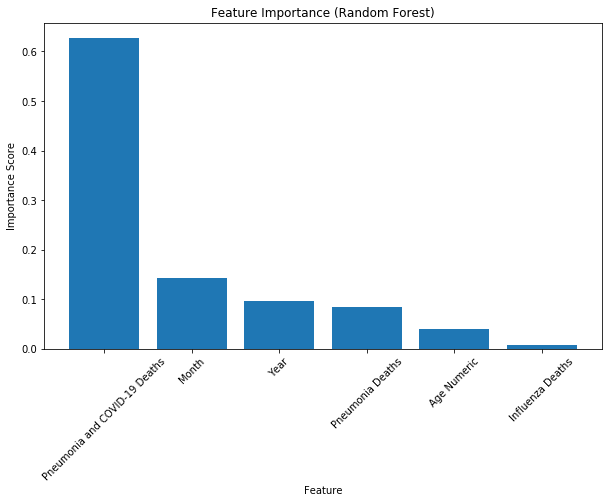

In [43]:
# Get feature importance scores
feature_importances = best_rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(sorted_indices)), np.array(X_train_final.columns)[sorted_indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.show()

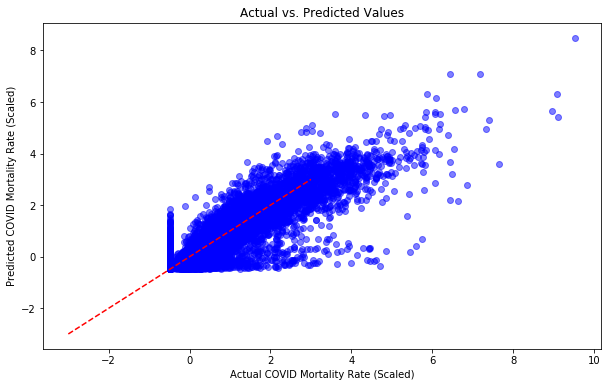

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_pred_best_rf, alpha=0.5, color="blue")
plt.plot([-3, 3], [-3, 3], color="red", linestyle="--")  # Identity line (perfect predictions)
plt.xlabel("Actual COVID Mortality Rate (Scaled)")
plt.ylabel("Predicted COVID Mortality Rate (Scaled)")
plt.title("Actual vs. Predicted Values")
plt.show()


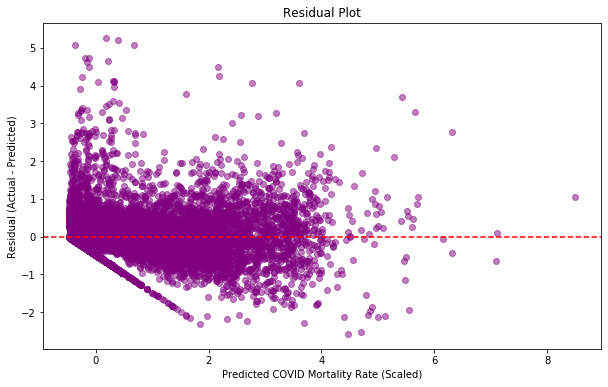

In [45]:
residuals = y_test_scaled - y_pred_best_rf  # Compute residuals

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best_rf, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color="red", linestyle="--")  # Ideal residual line
plt.xlabel("Predicted COVID Mortality Rate (Scaled)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()